<bound method NDFrame.head of          0     1  2
0     0.19  0.26  1
1     0.97  0.40 -1
2     0.65  0.24 -1
3     0.28 -0.69 -1
4     0.22 -0.88 -1
...    ...   ... ..
1623  0.74 -0.37 -1
1624  0.71  0.04 -1
1625  0.31 -0.94 -1
1626 -0.24 -0.71 -1
1627 -0.62 -0.84 -1

[1628 rows x 3 columns]>


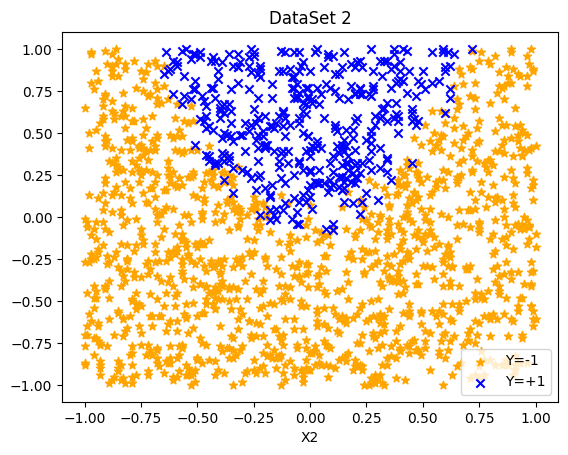

In [ ]:
import numpy as np
import pandas as pd

# Dataset (2) #id:24-48-24-1
data_frame = pd.read_csv("week4_2.csv", header=None)
print(data_frame.head)

import matplotlib.pyplot as plt

X1 = data_frame.iloc[:,0]
X2 = data_frame.iloc[:,1]
X = np.column_stack((X1,X2))
y = data_frame.iloc[:,2]

n_one = plt.scatter(X1[y<0], X2[y<0], marker='*' , color='orange', label='Y=-1')
p_one = plt.scatter(X1[y>0], X2[y>0], marker='x' , color='blue', label='Y=+1')
plt.xlabel("X1")
plt.xlabel("X2")
plt.legend(handles=[n_one,p_one], loc="lower right")
plt.title("DataSet 2")
plt.show()



C: 0.1, Degree: 1 -> F1: 52.80% (+/- 1.93%)
C: 0.1, Degree: 2 -> F1: 81.42% (+/- 2.22%)
C: 0.1, Degree: 3 -> F1: 80.62% (+/- 2.44%)
C: 0.1, Degree: 4 -> F1: 82.05% (+/- 2.64%)
C: 0.1, Degree: 5 -> F1: 82.16% (+/- 2.58%)
C: 0.1, Degree: 6 -> F1: 82.22% (+/- 2.54%)
C: 0.1, Degree: 7 -> F1: 82.22% (+/- 2.54%)


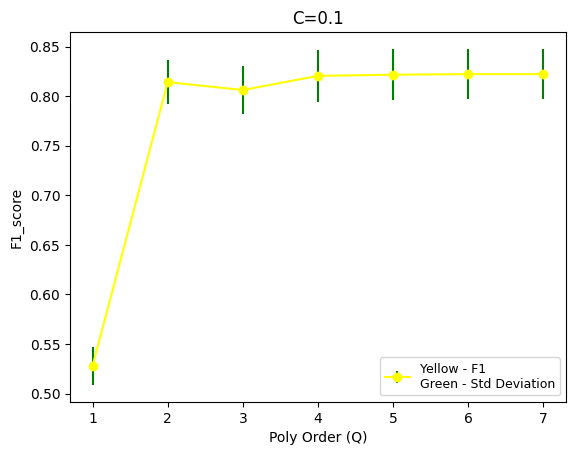

C: 1, Degree: 1 -> F1: 56.98% (+/- 2.06%)
C: 1, Degree: 2 -> F1: 92.33% (+/- 1.91%)
C: 1, Degree: 3 -> F1: 91.75% (+/- 2.16%)
C: 1, Degree: 4 -> F1: 91.76% (+/- 2.09%)
C: 1, Degree: 5 -> F1: 91.75% (+/- 1.89%)
C: 1, Degree: 6 -> F1: 91.75% (+/- 1.89%)
C: 1, Degree: 7 -> F1: 91.61% (+/- 1.76%)


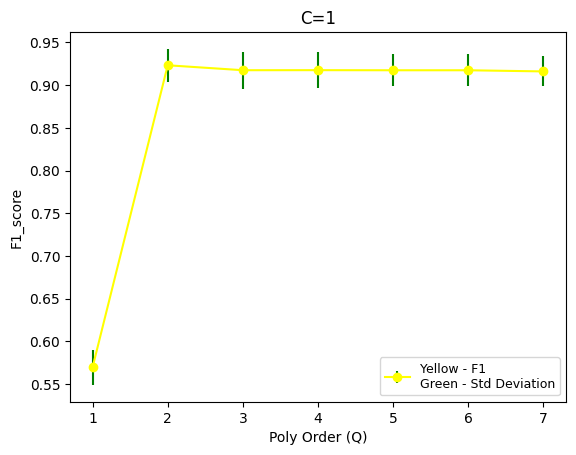

C: 5, Degree: 1 -> F1: 56.91% (+/- 1.84%)
C: 5, Degree: 2 -> F1: 92.50% (+/- 1.44%)
C: 5, Degree: 3 -> F1: 92.11% (+/- 2.14%)
C: 5, Degree: 4 -> F1: 92.10% (+/- 2.03%)
C: 5, Degree: 5 -> F1: 92.25% (+/- 1.79%)
C: 5, Degree: 6 -> F1: 92.11% (+/- 1.67%)
C: 5, Degree: 7 -> F1: 92.11% (+/- 1.67%)


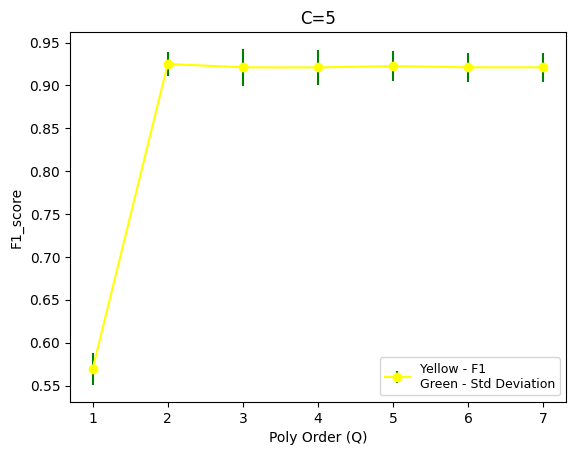

C: 10, Degree: 1 -> F1: 57.29% (+/- 1.87%)
C: 10, Degree: 2 -> F1: 92.52% (+/- 1.43%)
C: 10, Degree: 3 -> F1: 92.39% (+/- 1.77%)
C: 10, Degree: 4 -> F1: 92.26% (+/- 1.92%)
C: 10, Degree: 5 -> F1: 92.26% (+/- 1.92%)
C: 10, Degree: 6 -> F1: 92.13% (+/- 1.89%)
C: 10, Degree: 7 -> F1: 92.13% (+/- 1.89%)


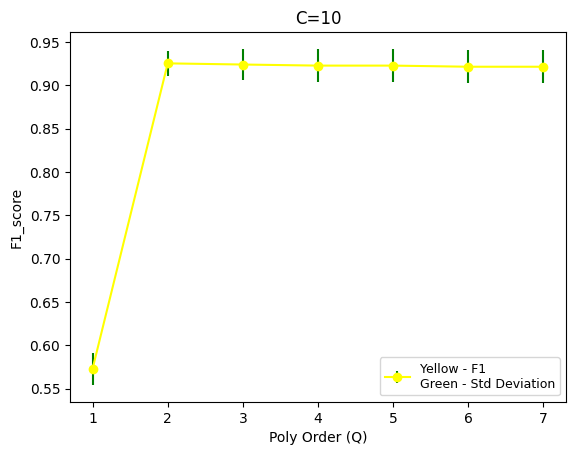

C: 20, Degree: 1 -> F1: 57.29% (+/- 1.87%)
C: 20, Degree: 2 -> F1: 92.68% (+/- 1.79%)
C: 20, Degree: 3 -> F1: 92.54% (+/- 1.63%)
C: 20, Degree: 4 -> F1: 92.41% (+/- 1.87%)
C: 20, Degree: 5 -> F1: 92.41% (+/- 1.87%)
C: 20, Degree: 6 -> F1: 92.56% (+/- 1.66%)
C: 20, Degree: 7 -> F1: 92.56% (+/- 1.66%)


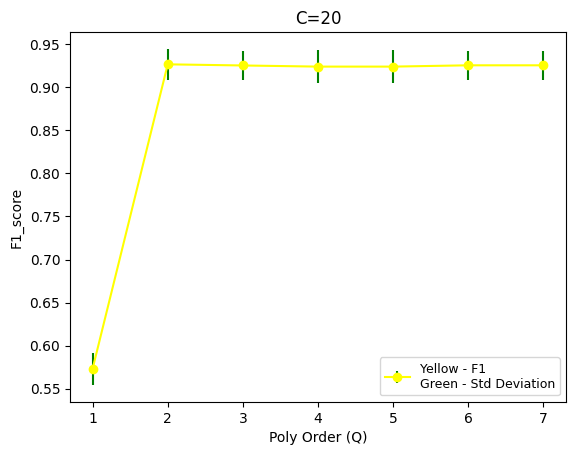

C: 50, Degree: 1 -> F1: 57.22% (+/- 1.92%)
C: 50, Degree: 2 -> F1: 92.56% (+/- 1.60%)
C: 50, Degree: 3 -> F1: 92.55% (+/- 1.71%)
C: 50, Degree: 4 -> F1: 92.81% (+/- 1.68%)
C: 50, Degree: 5 -> F1: 92.81% (+/- 1.68%)
C: 50, Degree: 6 -> F1: 92.68% (+/- 1.79%)
C: 50, Degree: 7 -> F1: 92.81% (+/- 1.68%)


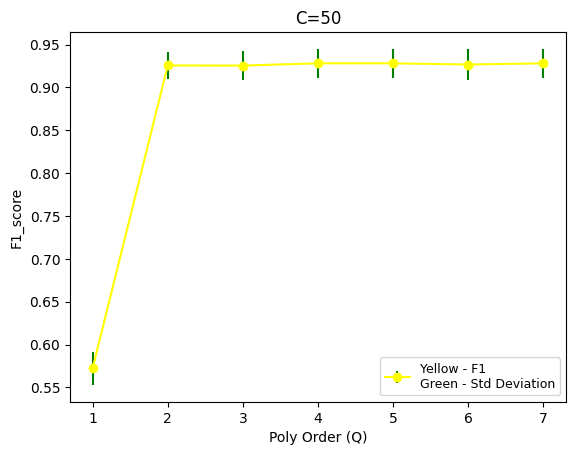

In [ ]:
from sklearn.preprocessing import  PolynomialFeatures
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold
from sklearn.metrics import f1_score

k_fold = KFold(n_splits=5)

degrees = [1,2,3,4,5,6,7]
C = [ 0.1, 1, 5, 10, 20, 50 ]

for c in C:

  mean_f1=[]
  std_=[]

  for degree in degrees:
    temp=[]
    poly_F = PolynomialFeatures(degree)
    X_poly = poly_F.fit_transform(X)
    log_reg = LogisticRegression(C=c, penalty='l2', max_iter=1000)

    for train, test in k_fold.split(X_poly):
      log_reg.fit(X_poly[train], y[train])
      pred = log_reg.predict(X_poly[test])
      temp.append(f1_score(y[test],pred))

    print(f"C: {c}, Degree: {degree} -> F1: {np.array(temp).mean():.2%} (+/- {np.array(temp).std():.2%})")

    mean_f1.append(float(np.array(temp).mean()))
    std_.append(float(np.array(temp).std()))


  plt.errorbar(degrees,mean_f1,yerr=std_,ecolor='green',fmt='-o' , label="Yellow - F1\nGreen - Std Deviation",color="yellow")
  plt.xlabel("Poly Order (Q)")
  plt.ylabel("F1_score")
  plt.legend(fontsize=9, loc="lower right")
  plt.title(f"C={c}")
  plt.show()


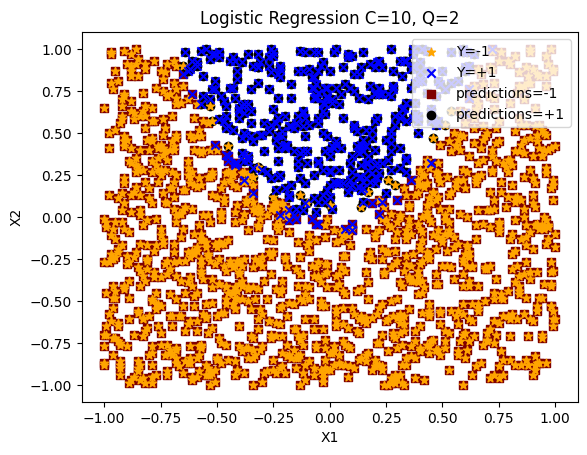

In [ ]:
poly_F = PolynomialFeatures(2)
X_poly = poly_F.fit_transform(X)
log_reg = LogisticRegression(C=10, penalty='l2', max_iter=1000)
log_reg.fit(X_poly, y)
lr_predict = log_reg.predict(X_poly)

predict_n = plt.scatter(X1[lr_predict<0],X2[lr_predict<0], marker='s', color='maroon',label='predictions=-1')
predict_p = plt.scatter(X1[lr_predict>0],X2[lr_predict>0], marker='o', color='black', label='predictions=+1')

n_one = plt.scatter(X1[y<0], X2[y<0], marker='*' , color='orange', label='Y=-1')
p_one = plt.scatter(X1[y>0], X2[y>0], marker='x' , color='blue', label='Y=+1')


plt.xlabel("X1")
plt.ylabel("X2")
plt.legend(handles=[n_one,p_one, predict_n, predict_p], loc="upper right")
plt.title("Logistic Regression C=10, Q=2")
plt.show()


K:1 -> F1: 92.66% (+/- 0.74%)
K:3 -> F1: 93.58% (+/- 1.66%)
K:5 -> F1: 93.93% (+/- 1.52%)
K:6 -> F1: 93.88% (+/- 1.20%)
K:7 -> F1: 93.89% (+/- 1.36%)
K:8 -> F1: 94.02% (+/- 1.02%)
K:9 -> F1: 94.20% (+/- 0.74%)
K:10 -> F1: 93.57% (+/- 1.48%)
K:15 -> F1: 93.76% (+/- 1.49%)
K:20 -> F1: 93.01% (+/- 0.86%)


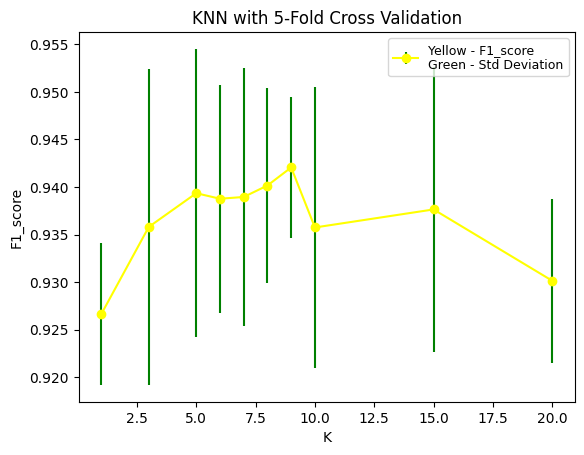

In [ ]:
# ii(b)
from sklearn.neighbors import KNeighborsClassifier

# K = [1,5,10,20,30,45,60,80,150,200]
K = [1,3,5,6,7,8,9,10,15,20]

kn_f1 =[]
kn_std = []

for k in K:
  kn_model = KNeighborsClassifier(n_neighbors=k)
  temp = []
  for train,test in k_fold.split(X):
    kn_model.fit(X[train], y[train])
    pred = kn_model.predict(X[test])
    temp.append(f1_score(y[test],pred))

  kn_f1.append(float(np.array(temp).mean()))
  kn_std.append(float(np.array(temp).std()))

  print(f"K:{k} -> F1: {np.array(temp).mean():.2%} (+/- {np.array(temp).std():.2%})")

plt.errorbar(K,kn_f1,yerr=kn_std,ecolor='green',fmt='-o' , label="Yellow - F1_score\nGreen - Std Deviation",color="yellow")
plt.xlabel("K")
plt.ylabel("F1_score")
plt.legend(fontsize=9,loc='upper right')
plt.title("KNN with 5-Fold Cross Validation")
plt.show()



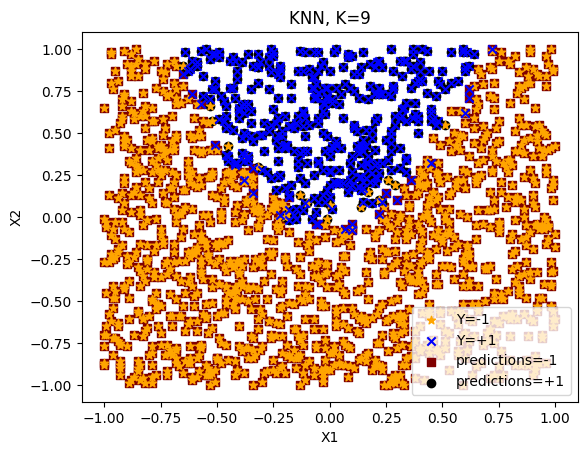

In [ ]:
# ii(b)
k9_model = KNeighborsClassifier(n_neighbors=9)
k9_model.fit(X,y)
K9_predict = k9_model.predict(X)

predict_n = plt.scatter(X1[K9_predict<0],X2[K9_predict<0], marker='s', color='maroon',label='predictions=-1')
predict_p = plt.scatter(X1[K9_predict>0],X2[K9_predict>0], marker='o', color='black', label='predictions=+1')

n_one = plt.scatter(X1[y<0], X2[y<0], marker='*' , color='orange', label='Y=-1')
p_one = plt.scatter(X1[y>0], X2[y>0], marker='x' , color='blue', label='Y=+1')


plt.xlabel("X1")
plt.ylabel("X2")
plt.legend(handles=[n_one,p_one, predict_n, predict_p], loc="lower right")
plt.title("KNN, K=9")
plt.show()

In [ ]:
# ii(c)
from sklearn.metrics import confusion_matrix

def Confusion_Matrix(model,X,y):
  model.fit(X,y)
  y_pred = model.predict(X)
  cm = confusion_matrix(y,y_pred)
  f1 = f1_score(y,y_pred)

  return cm,f1,y_pred

# LogReg cm
cm_lr, lr_f1 , _= Confusion_Matrix(log_reg,X_poly,y)
print("Log Reg Confusion Matrix: \n", cm_lr)
print(f"F1_score: {lr_f1:.2%}")


# KNN 9 cm
cm_knn9, knn9_f1 , knn9_predict = Confusion_Matrix(k9_model,X,y)
print("KNN 9 Confusion Matrix: \n", cm_knn9)
print(f"F1_score: {knn9_f1:.2%}")


# Baseline Classifier

from sklearn.dummy import DummyClassifier

most_frequent_Dummy = DummyClassifier(strategy="most_frequent")
random_Dummy = DummyClassifier(strategy="uniform")

cm_most, most_f1 , most_pred = Confusion_Matrix(most_frequent_Dummy,X,y)
print("Most Frequent Dummy Confusion Matrix: \n", cm_most)
print(f"F1_score: {most_f1:.2%}")

cm_random, random_f1 , random_pred= Confusion_Matrix(random_Dummy,X,y)
print("Random Dummy Confusion Matrix: \n", cm_random)
print(f"F1_score: {random_f1:.2%}")


Log Reg Confusion Matrix: 
 [[1227   19]
 [  32  350]]
F1_score: 93.21%
KNN 9 Confusion Matrix: 
 [[1228   18]
 [  23  359]]
F1_score: 94.60%
Most Frequent Dummy Confusion Matrix: 
 [[1246    0]
 [ 382    0]]
F1_score: 0.00%
Random Dummy Confusion Matrix: 
 [[612 634]
 [178 204]]
F1_score: 33.44%


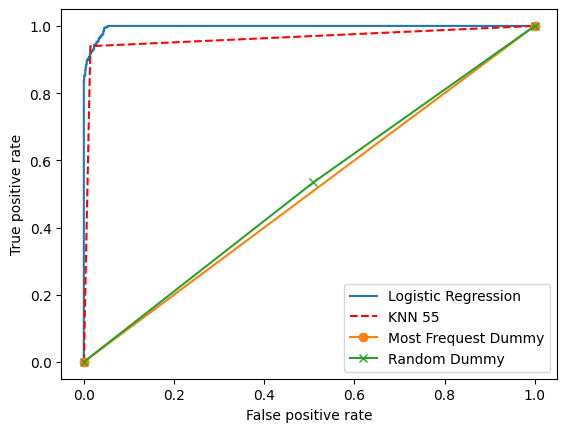

0.9748157248157249
0.9686732186732187


In [ ]:
# ii(d)

from sklearn.metrics import roc_curve

FP, TP, _ = roc_curve(y,log_reg.decision_function(X_poly))
plt.plot(FP,TP, label='Logistic Regression')

FP, TP, _ = roc_curve(y,knn9_predict)
plt.plot(FP,TP, label='KNN 55',linestyle='--',color='red')

FP, TP, _ = roc_curve(y,most_pred)
plt.plot(FP,TP, label='Most Frequest Dummy', marker='o')

FP, TP, _ = roc_curve(y, random_pred)
plt.plot(FP,TP, label='Random Dummy' ,marker='x')

plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.legend()
plt.show()

from sklearn.metrics import accuracy_score

knn9_acc = accuracy_score(y,K9_predict)
print(knn9_acc)

logreg_acc = accuracy_score(y,lr_predict)
print(logreg_acc)

